In [93]:
import tensorflow as tf

In [94]:
import numpy as np

In [95]:
import matplotlib.pyplot as plt

In [96]:
dates = np.array(range(9))

In [97]:
beginPrice = np.array([112,103,120,156,132,145,223,215,314])

In [98]:
endPrice = np.array([108,112,145,110,131,125,152,178,236])

In [99]:
plt.figure()
for i in range(len(dates)):
    x = np.zeros(2)
    y = np.zeros(2)
    x[0] = i
    x[1] = i
    y[0] = beginPrice[i]
    y[1] = endPrice[i]
    if(beginPrice[i]<endPrice[i]):
        plt.plot(x,y,'r',lw=8)
    else:
        plt.plot(x,y,'g',lw=8)
#plt.show()

In [100]:
dateNormal = np.zeros([9,1])
priceNormal = np.zeros([9,1])
for i in range(len(dates)):
    dateNormal[i,0] = i/9.0
    priceNormal[i,0] = endPrice[i]/236.0

x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

w1 = tf.Variable(tf.random_uniform([1, 5],0,1))
b1 = tf.Variable(tf.zeros([1,5]))
wb1 = tf.matmul(x,w1) + b1
layer1 = tf.nn.relu(wb1) #第一层输出
print(layer1.shape)

(?, 5)


In [101]:
w2 = tf.Variable(tf.random_uniform([5,1],0,1))
b2 = tf.Variable(tf.zeros([9,1]))
wb2 = tf.matmul(layer1,w2) + b2
layer2 = tf.nn.relu(wb2)

In [102]:
loss = tf.reduce_mean(tf.square(y-layer2))

In [103]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

108.0
112.0
145.0
110.0
131.0
125.0
152.0
178.0
236.0


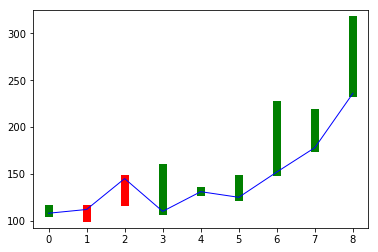

In [104]:
with tf.Session()  as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(10000):
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
    pred = sess.run(layer2,feed_dict={x:dateNormal})
    predPrice = np.zeros([9,1])
    for i in range(len(dates)):
        print((pred*236)[i,0])
        predPrice[i,0] = (pred*236)[i,0]
        
    plt.plot(dates,predPrice,'b',lw=1)
plt.show()